In [1]:
# Importing all required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web

from matplotlib.ticker import FuncFormatter

from pypfopt import objective_functions
from pypfopt import risk_models
from pypfopt import expected_returns
#from pypfopt import plotting

from pypfopt.cla import CLA
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.efficient_frontier import EfficientFrontier

# library
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

# Risk free rate:

rf = 0.025

# Use an api to obtain a time series of a selected set of stocks, identified by their tickers.

tickers = ['GOOG','AAPL','FB','BABA','AMZN','GE','AMD','WMT','BAC','GM','T','UAA','XOM','RRC','BBY','MA','PFE','JPM','SBUX']

price_data = []

start='2010-1-1'
end = '2021-12-31'

for ticker in tickers:
    
    prices = web.DataReader(ticker, 'stooq',start,end)
    
    price_data.append(prices.assign(ticker=ticker)[['Close']])
    
df_stocks = pd.concat(price_data, axis=1)
df_stocks.columns=tickers

df_stocks = df_stocks.sort_index()
df_stocks.head()

df_stocks.to_excel("df_stocks.xlsx")

# Obtain descriptive statistics of the sample

# Annualized Return
mu = expected_returns.mean_historical_return(df_stocks)

# Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df_stocks)

# Calculate the Sharpe ratio (mu/Sigma) of the different combinations of stocks within portfolios, and find those portfolios that have the highest Ratio given Sigma (efficient)

ef = EfficientFrontier(mu-rf, Sigma) 

sharpe_pfolio = ef.max_sharpe() 
sharpe_pwt    = ef.clean_weights()

ef.clean_weights()

OrderedDict([('GOOG', 0.0),
             ('AAPL', 0.46387),
             ('FB', 0.01268),
             ('BABA', 0.0),
             ('AMZN', 0.27304),
             ('GE', 0.0),
             ('AMD', 0.0),
             ('WMT', 0.0),
             ('BAC', 0.0),
             ('GM', 0.0),
             ('T', 0.0),
             ('UAA', 0.0),
             ('XOM', 0.0),
             ('RRC', 0.0),
             ('BBY', 0.0),
             ('MA', 0.08094),
             ('PFE', 0.0),
             ('JPM', 0.0),
             ('SBUX', 0.16947)])

In [5]:
PERF = ef.portfolio_performance(verbose=True)

Expected annual return: 26.9%
Annual volatility: 22.7%
Sharpe Ratio: 1.10


In [6]:
d = {"Annual Return":PERF[0],"Annual Volatility":PERF[1],"Sharpe Ratio":PERF[2]}

Performance = pd.DataFrame(data=d,index=["Values"])
Performance

,Annual Return,Annual Volatility,Sharpe Ratio
Values,0.268908,0.227131,1.095876


In [8]:
Portf_t = list(sharpe_pwt.keys())
Portf_w = list(sharpe_pwt.values())

P_T = []
P_W = []

for i in range(len(Portf_t)):
    
    P_T.append(Portf_t[i])
    P_W.append(Portf_w[i])
    
PORTF   = pd.DataFrame(data=P_W,columns=['Weights'],index=P_T)
PORTpos = PORTF.loc[PORTF['Weights'] >0]

PORTpos

,Weights
AAPL,0.46387
FB,0.01268
AMZN,0.27304
MA,0.08094
SBUX,0.16947


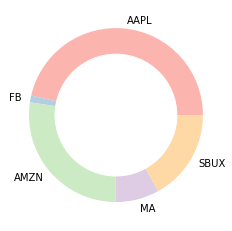

In [12]:
# create data
names = list(PORTpos.index)
size  = list(PORTpos.Weights)
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.savefig("chart.png", format="png") # specify filetype explicitly

plt.show()
plt.close()

In [13]:
# 1. Set up multiple variables to store the titles, text within the report
page_title_text='My report'
title_text = 'Recommended Portfolio'
text = 'Find below your optimal portfolio based on your risk profile and recent market conditions'
stats_text = 'Percentage of optimal portfolio on individual stocks'
perf_text  = 'Performance of optimal portfolio'


# 2. Combine them together using a long f-string
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <img src='chart.png' width="700">
            <h2>{perf_text}</h2>
            {Performance.to_html()}
            <h2>{stats_text}</h2>
            {PORTF.to_html()}
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
with open('html_report.html', 'w') as f:
    f.write(html)

In [ ]:
PersonalStatementOnRisk = input('Enter your perception on risk: ')

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()

sa.polarity_scores(PersonalStatementOnRisk)

In [ ]:
if sa.polarity_scores(PersonalStatementOnRisk)['neg']>sa.polarity_scores(PersonalStatementOnRisk)['neu'] and sa.polarity_scores(PersonalStatementOnRisk)['neg']>sa.polarity_scores(PersonalStatementOnRisk)['pos']:
    
    print("Propose Minimum Variance portfolio")
    
elif sa.polarity_scores(PersonalStatementOnRisk)['pos']>sa.polarity_scores(PersonalStatementOnRisk)['neu'] and sa.polarity_scores(PersonalStatementOnRisk)['pos']>sa.polarity_scores(PersonalStatementOnRisk)['neg']:
    
    print("Propose Optimal Portfolio + Options Strategy ")
    
else:
    
    print("Propose Optimal Portfolio")

In [ ]:
sa.polarity_scores("neg")

In [ ]:
sa.polarity_scores(PersonalStatementOnRisk)['neg']